### Advanced Regression - House Price Prediction

Required to model the price of houses with the available independent variables. 

#### There will be 5 Steps in this Analysis
* Step 1 - Reading , Understanding and Visualising the Data
* Step 2 - Preparing the data for Data Modelling
* Step 3 - Training the Model/Models
* Step 4 - Tuning with Regularization (Ridge & Lasso) & Prediction
* Step 5 - Model Evaluation and Comparision

In [379]:
# importing all the libraries we wanted for this analysis
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge,Lasso,LinearRegression
import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew
from sklearn.feature_selection import RFE,RFECV,VarianceThreshold
from sklearn.model_selection import KFold,train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Step 1 - Reading , Understanding and Visualising the Data

In [380]:
# reading the housing dataset
housingData = pd.read_csv('train.csv')

In [381]:
# this is how the dataset looks like
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [261]:
# there are 1460 rows and 81 columns in the dataset
housingData.shape

(1460, 81)

In [5]:
# information about the datset, null count and data types
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housingData.duplicated().sum()   #no duplicates in this housing dataset

0

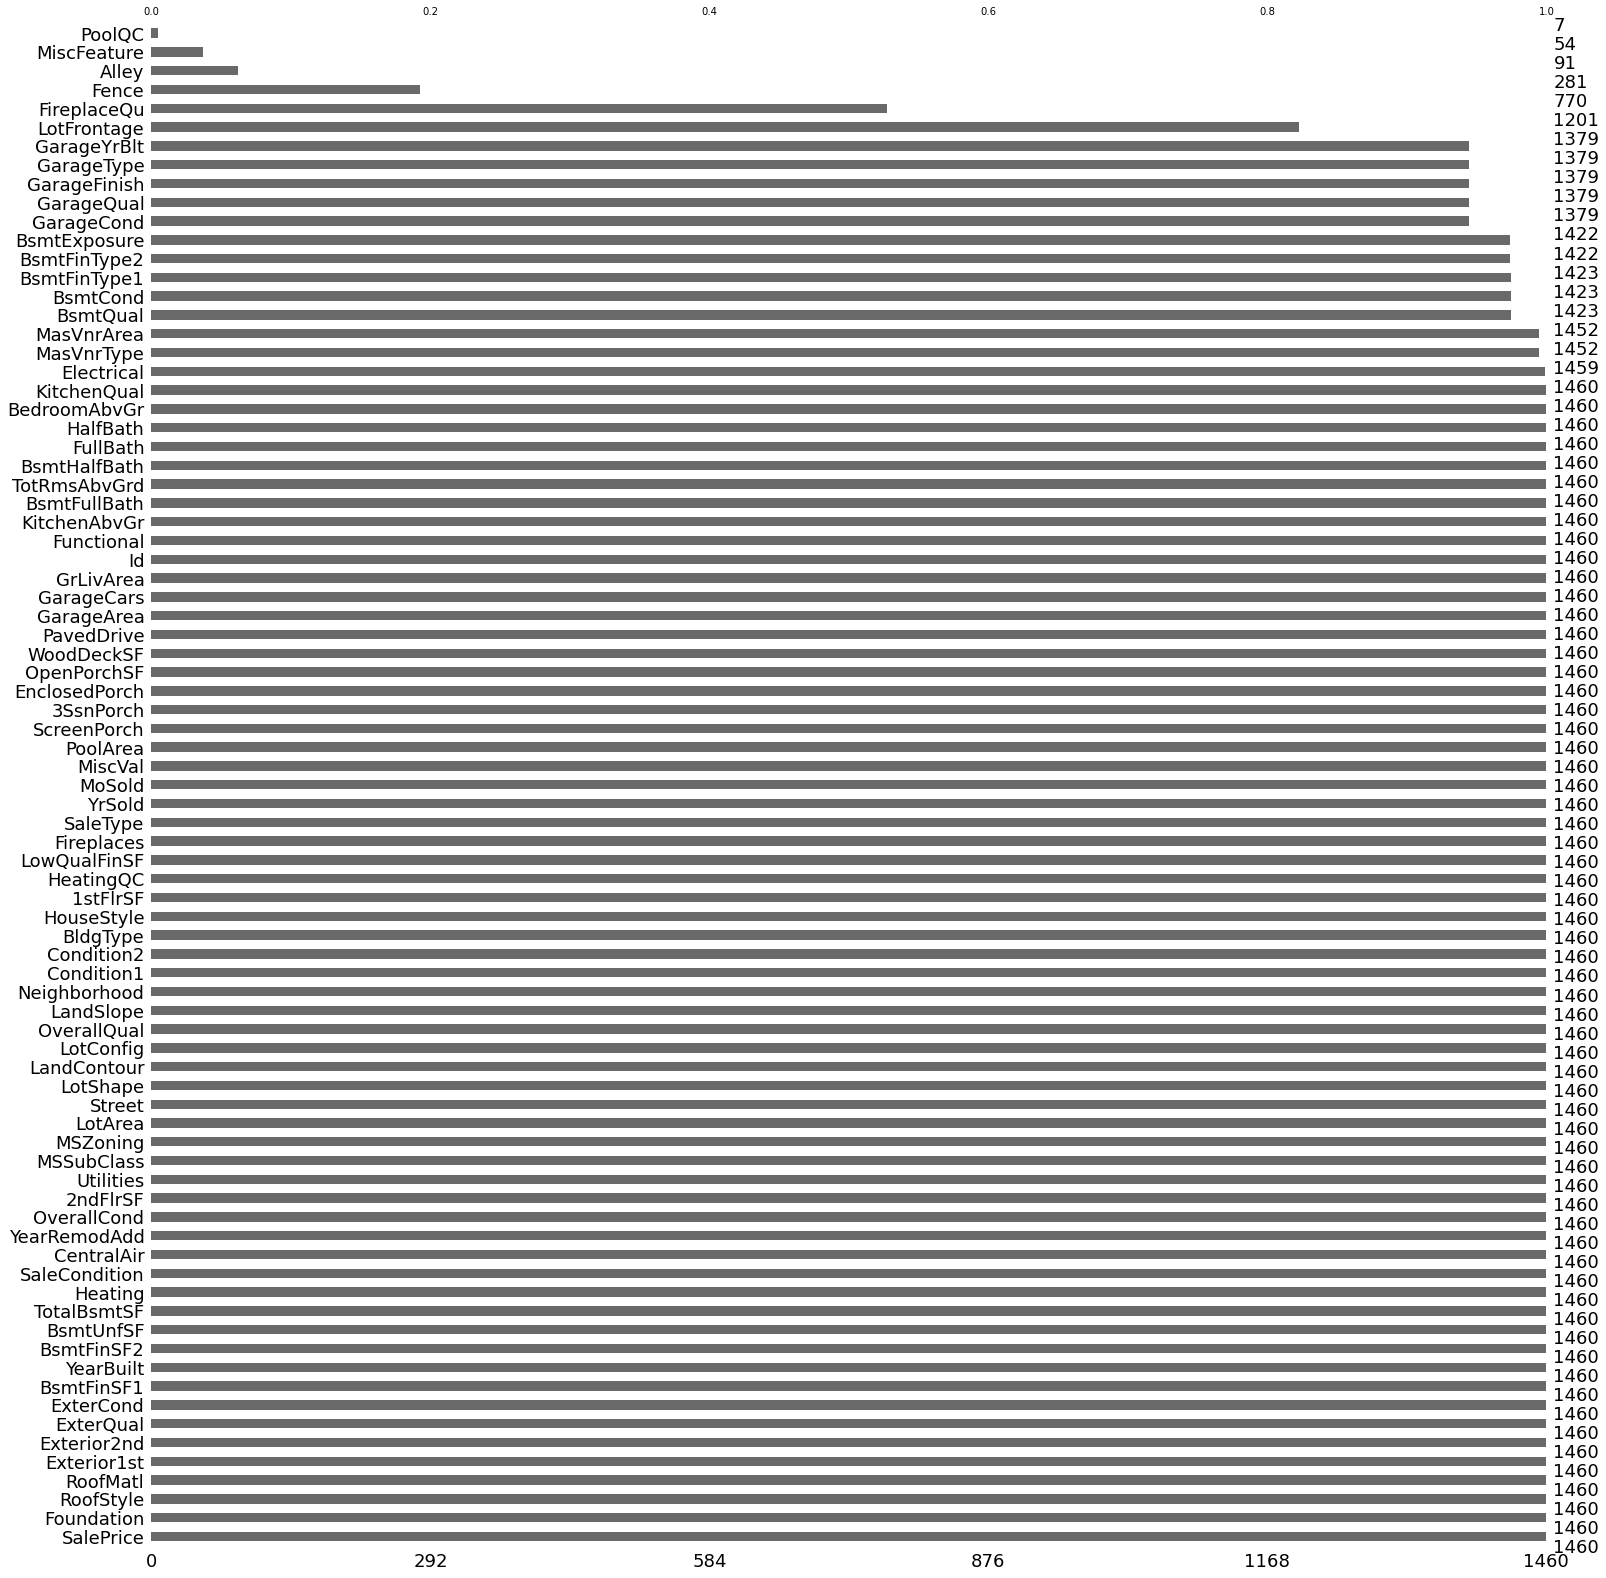

In [7]:
msno.bar(housingData , sort = 'descending' , fontsize=18) #visualisation of missing values if present in the dataset
plt.show()

In the above visualisation, bars represent the number of values in a particular column and we can clearly see that there are few variables in the dataset with missing values

* Before we go ahead and visualise the data, lets first use the data dictionary to impute few values for better visualisation and with the help of info() we also will convert some int/float values which have no numeric meaning such as date to string as we dont want to use them as a numeric feature in our data modelling

* According to the Data Dictionary provided which has details of all the variables in the dataset. For the 15 variables listed below the NA values are not missing values that actually indicates absence of that particular facility (for eg. NA value in Alley means No Alley Access present)

"Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"

In [382]:
#Imputing values for the above variables

# According to data dictionary na in Alley means 'No alley access'
housingData.loc[housingData['Alley'].isnull(),'Alley'] = 'No alley access'

# According to data dictionary na in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 means ''No Basement'
housingData.loc[housingData['BsmtQual'].isnull(),'BsmtQual'] = 'No Basement'
housingData.loc[housingData['BsmtCond'].isnull(),'BsmtCond'] = 'No Basement'
housingData.loc[housingData['BsmtExposure'].isnull(),'BsmtExposure'] = "No Basement"
housingData.loc[housingData['BsmtFinType1'].isnull(),'BsmtFinType1'] = 'No Basement'
housingData.loc[housingData['BsmtFinType2'].isnull(),'BsmtFinType2'] = 'No Basement'

# According to data dictionary na in FireplaceQu means 'No Fireplace'
housingData.loc[housingData['FireplaceQu'].isnull(),'FireplaceQu'] = 'No Fireplace'

# According to data dictionary na in GarageType,GarageFinish,GarageQual,GarageCond means 'No Garage'
housingData.loc[housingData['GarageType'].isnull(),'GarageType'] = 'No Garage'
housingData.loc[housingData['GarageFinish'].isnull(),'GarageFinish'] = 'No Garage'
housingData.loc[housingData['GarageQual'].isnull(),'GarageQual'] = 'No Garage'
housingData.loc[housingData['GarageCond'].isnull(),'GarageCond'] = 'No Garage'

# According to data dictionary na in PoolQC means 'No Pool'
housingData.loc[housingData['PoolQC'].isnull(),'PoolQC'] = 'No Pool'

# According to data dictionary na in Fence means 'No Fence'
housingData.loc[housingData['Fence'].isnull(),'Fence'] = 'No Fence'

# According to data dictionary na in MiscFeature means 'none'
housingData.loc[housingData['MiscFeature'].isnull(),'MiscFeature'] = 'none'

In [4]:
# checking for NA values for GarageYrBlt
housingData[housingData['GarageYrBlt'].isna()][['GarageType','GarageYrBlt']]

,GarageType,GarageYrBlt
39,No Garage,NaN
48,No Garage,NaN
78,No Garage,NaN
88,No Garage,NaN
89,No Garage,NaN
...,...,...
1349,No Garage,NaN
1407,No Garage,NaN
1449,No Garage,NaN
1450,No Garage,NaN


So the NA values in GarageYrBlt are only present where GarageType is No Garage hence no year mentioned when garage was built so we can impute 0 for it

In [383]:
housingData['GarageYrBlt'] = housingData['GarageYrBlt'].fillna(0)

In [384]:
# checking for NA values for MasVnrArea & MasVnrType variables
housingData[housingData['MasVnrArea'].isna()][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


Both MasVnrArea and MasVnrType have 8 missing values where both are NA. As we have a None as one of the value in MasVnrType its most likely that NA can be No masonry veener type and hence the MasVnrArea which is the Masonry veneer area associated will also be 0.

In [385]:
housingData.loc[housingData['MasVnrType'].isnull(),'MasVnrType'] = 'None'
housingData['MasVnrArea'] = housingData['MasVnrArea'].fillna(0)

Area of each street connected to the house is most likely to have a similar area of the other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [386]:
housingData['LotFrontage'] = housingData.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [387]:
# Now after imputing the values lets check the List of all the columns of this dataset with Missing value percentage
naValues = round(housingData.isna().sum()/len(housingData)*100,2).sort_values(ascending=False)
print('Missing Value Percentage of the columns in Housing Data')
print(naValues)

Missing Value Percentage of the columns in Housing Data
Electrical     0.07
CentralAir     0.00
GarageYrBlt    0.00
GarageType     0.00
FireplaceQu    0.00
               ... 
MasVnrArea     0.00
MasVnrType     0.00
Exterior2nd    0.00
Exterior1st    0.00
SalePrice      0.00
Length: 81, dtype: float64


As we can see only 'Electrical' have Missing values as nothing is mentioned about NA values in the data dictionary provided. Later is our analysis we will use mode imputation to fill the NA values of this column as it is a categorical feature.

Data Visualisation (EDA)

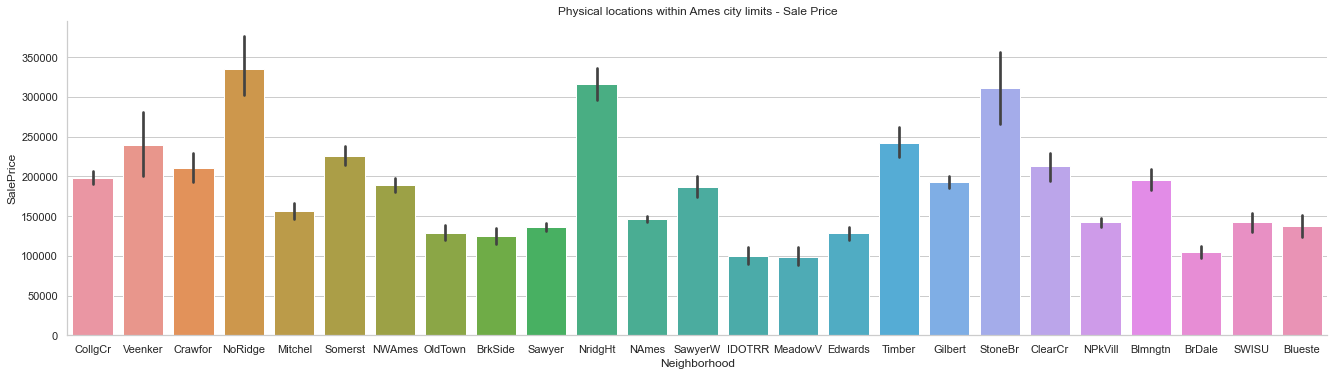

In [149]:
sns.set_theme(style = 'whitegrid')
sns.catplot(x='Neighborhood',y='SalePrice' , data=housingData , kind='bar' , aspect =3.7)
plt.title('Physical locations within Ames city limits - Sale Price')
plt.show()

The above visual is Neighborhood with respect to Sale price. Sale Price for below locations is the maximum
* NoRidge - Northridge
* NridgHt - Northridge Heights
* StoneBr - Stone Brook

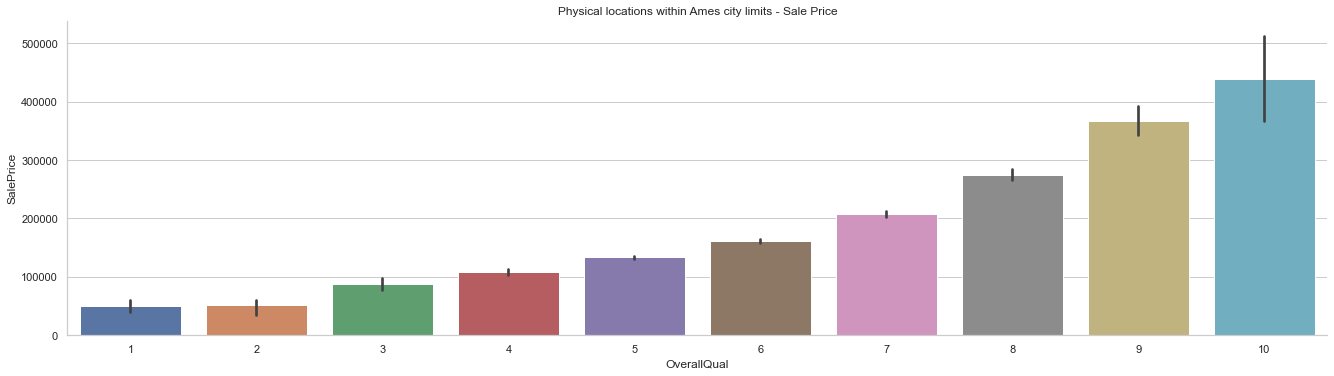

In [17]:
# sns.set_theme(style = 'whitegrid')
sns.catplot(x='OverallQual',y='SalePrice' , data=housingData , kind='bar' , aspect =3.7)
plt.title('Physical locations within Ames city limits - Sale Price')
plt.show()

The above visual tells us as the Overall Quality of the house increases from 1-10 the Sale Price also increases.
10 - Very Excellent     
9 - Excellent      
8 - Very Good        
7 - Good        
6 - Above Average          
5 - Average        
4 - Below Average        
3 - Fair               
2 - Poor                   
1 - Very Poor                

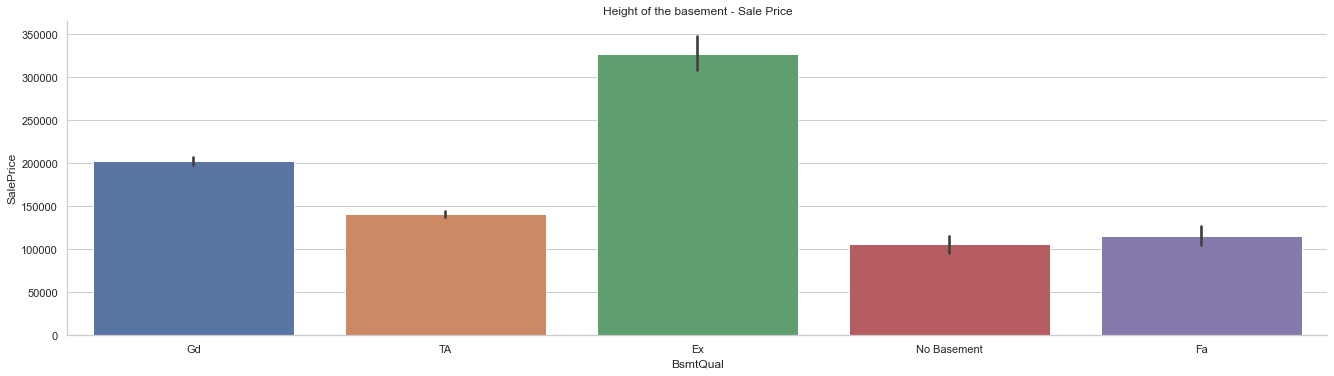

In [18]:
sns.catplot(x='BsmtQual',y='SalePrice' , data=housingData , kind='bar' , aspect =3.7)
plt.title('Height of the basement - Sale Price')
plt.show()

Looking at this Visual we understand if height of the basement increases the Sale price is also higher         
Ex means Excellent ie. height  is 100+ inches hence Sale Price is also highest               
Gd means Good ie. height is 90-99 inches, follwed by TA - Typical, Fa - Fair and least is No Basement

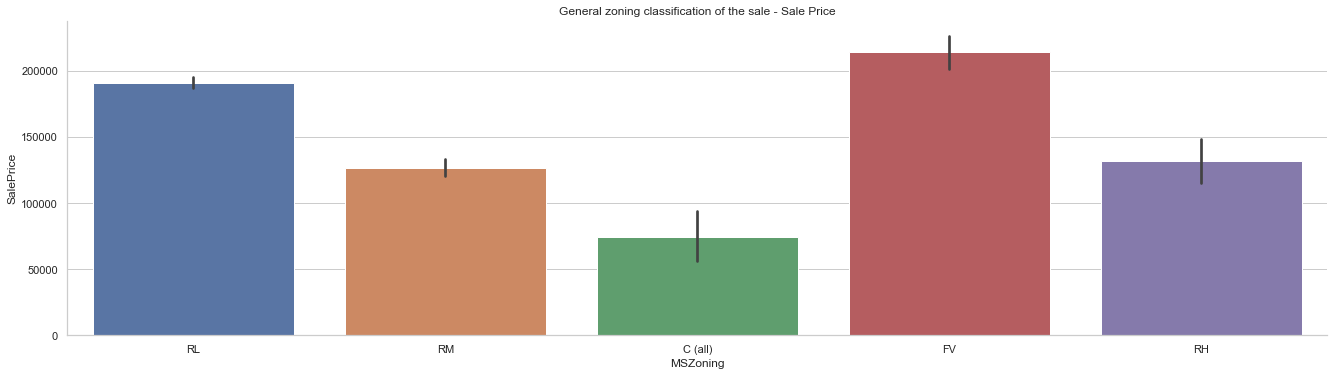

In [197]:
sns.catplot(x='MSZoning',y='SalePrice' , data=housingData , kind='bar' , aspect =3.7)
plt.title('General zoning classification of the sale - Sale Price')
plt.show()

Looking at the visual above         
FV - Floating Village Residential is the highest with respect to Sale Price follwed by RL - Residential Low Density,           RH - Residential High Density, RM - Residential Medium Density & C - Commercial   


In [14]:
housingData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The table above gives us details of all the numerical columns in the dataset and displays summary statistics for a dataframe It displays count, mean(average), standard deviation, minimum and maximum value present in that column and percentiles(25%,50% & 75%) which is 1st quartile(Q1),meadian(50%) and 3rd quartile(Q3) so this insight can also help us to understand the spread of the data.

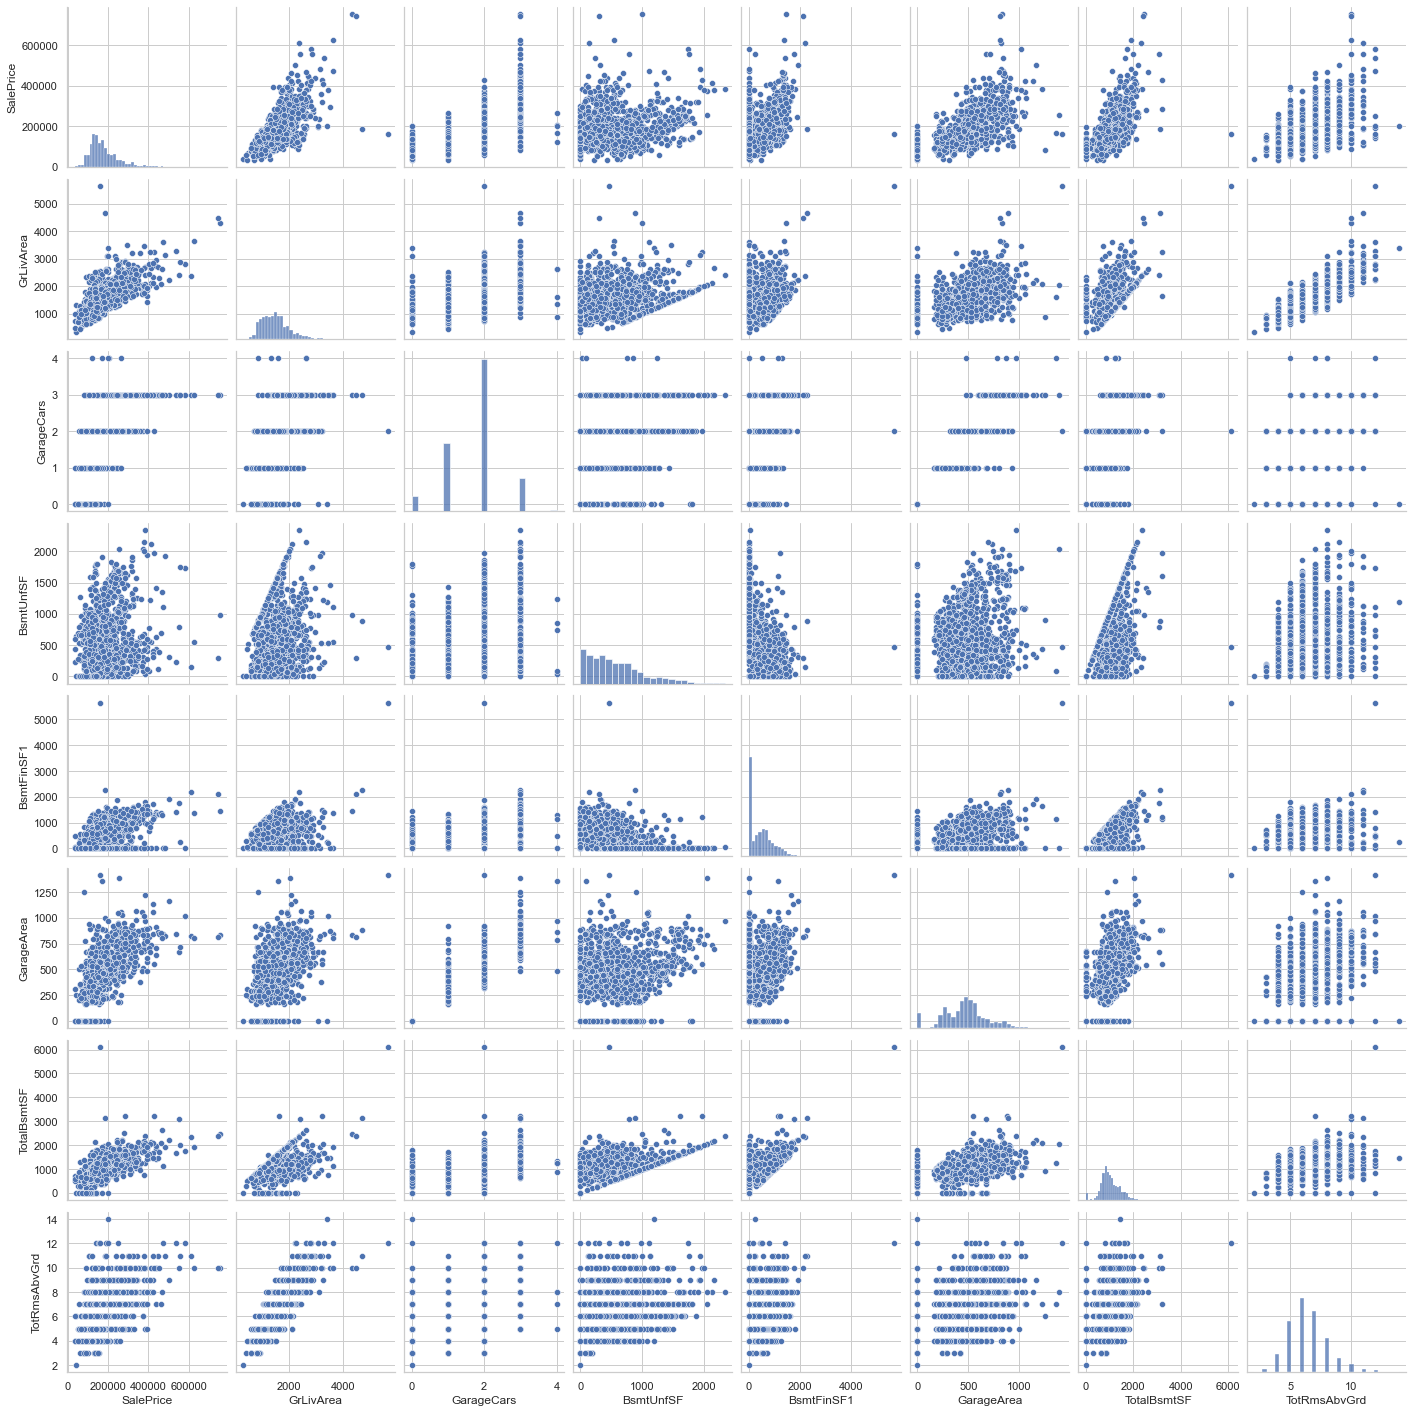

In [566]:
# lets try and visualise some numeric variables as well and check their relationship
sns.pairplot(housingData , vars = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd'])
plt.show()

* We can see an incresing trend in Sale Price with GrLivArea, TotalBsmtSF, GarageArea
* Above visual also tells us that there are outliers present in the data as well, lets try to visualise it for better understanding

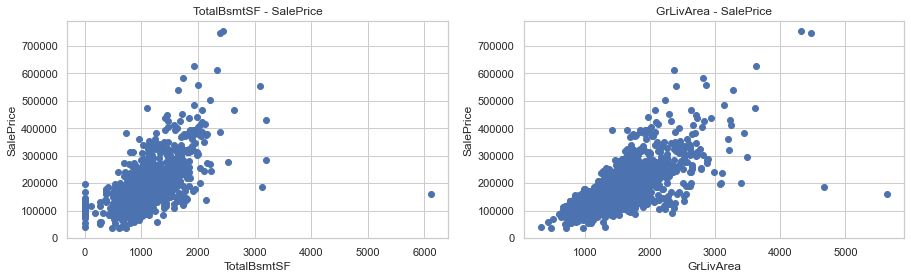

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(x = housingData['TotalBsmtSF'], y = housingData['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('TotalBsmtSF - SalePrice')
plt.subplot(1,2,2)
plt.scatter(x = housingData['GrLivArea'], y = housingData['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea - SalePrice')
plt.show()

* 1st Visual - As we can clearly see a dot on the right side of the plot where Sale Price is less and TotalBsmtSF is high hence can be removed because we will be using linear regression model later
* 2nd Visual - As we can clearly see 2 dots on the right side of the plot where Sale Price is less and GrLivArea is high hence can be removed because we will be using linear regression model later

* In the 1st visual we can see TotalBsmtSF is greater than 6000 and Sale Price is lower than 200000 to reach that outlier
* Simillarily in the 2nd visual then we can see GrLivArea is greater than 4000 and Sale Price is lower than 200000 to reach those two outliers.     
Lets check these records

In [753]:
# this is that one record which can be dropped from the dataset
housingData[(housingData['TotalBsmtSF'] > 6000) & (housingData['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,No alley access,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,No Fence,none,0,1,2008,New,Partial,160000


In [754]:
# this is that one record which can be dropped from the dataset
housingData[(housingData['GrLivArea'] > 4000) & (housingData['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,No alley access,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,No Pool,No Fence,none,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,No alley access,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,No Fence,none,0,1,2008,New,Partial,160000


Now if we check one record at 1298 index is common in GrLivArea & TotalBsmtSF. Hence we will go ahead and drop those two records from the dataset using GrLivArea

In [388]:
# we are dropping these two records from our dataset before we train our model
housingData = housingData.drop(housingData[(housingData['GrLivArea'] > 4000) & (housingData['SalePrice'] < 200000)].index)

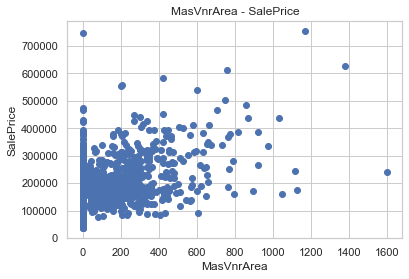

In [20]:
plt.scatter(x = housingData['MasVnrArea'], y = housingData['SalePrice'])
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.title('MasVnrArea - SalePrice')
plt.show()

As we can see there are few dots/values  which can be removed because we will be using linear regression model later
Such as value on the bottom right where MasVnrArea is high and Sales Price is low and top left value where Sales Price is High and MasVnrArea is 0. Hence such weird values can be removed before data modelling

In [1197]:
# these are the records which can be dropped from the dataset
housingData[((housingData['MasVnrArea'] > 1500) & (housingData['SalePrice'] < 300000)) | ((housingData['MasVnrArea'] < 1) & (housingData['SalePrice'] > 700000))]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,No Pool,No Fence,none,0,6,2007,WD,Normal,239000
1182,1183,60,RL,160.0,15623,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,none,0,7,2007,WD,Abnorml,745000


In [389]:
# we are dropping these records from our dataset before we train our model
housingData = housingData.drop(housingData[((housingData['MasVnrArea'] > 1500) & (housingData['SalePrice'] < 300000)) | ((housingData['MasVnrArea'] < 1) & (housingData['SalePrice'] > 700000))].index)

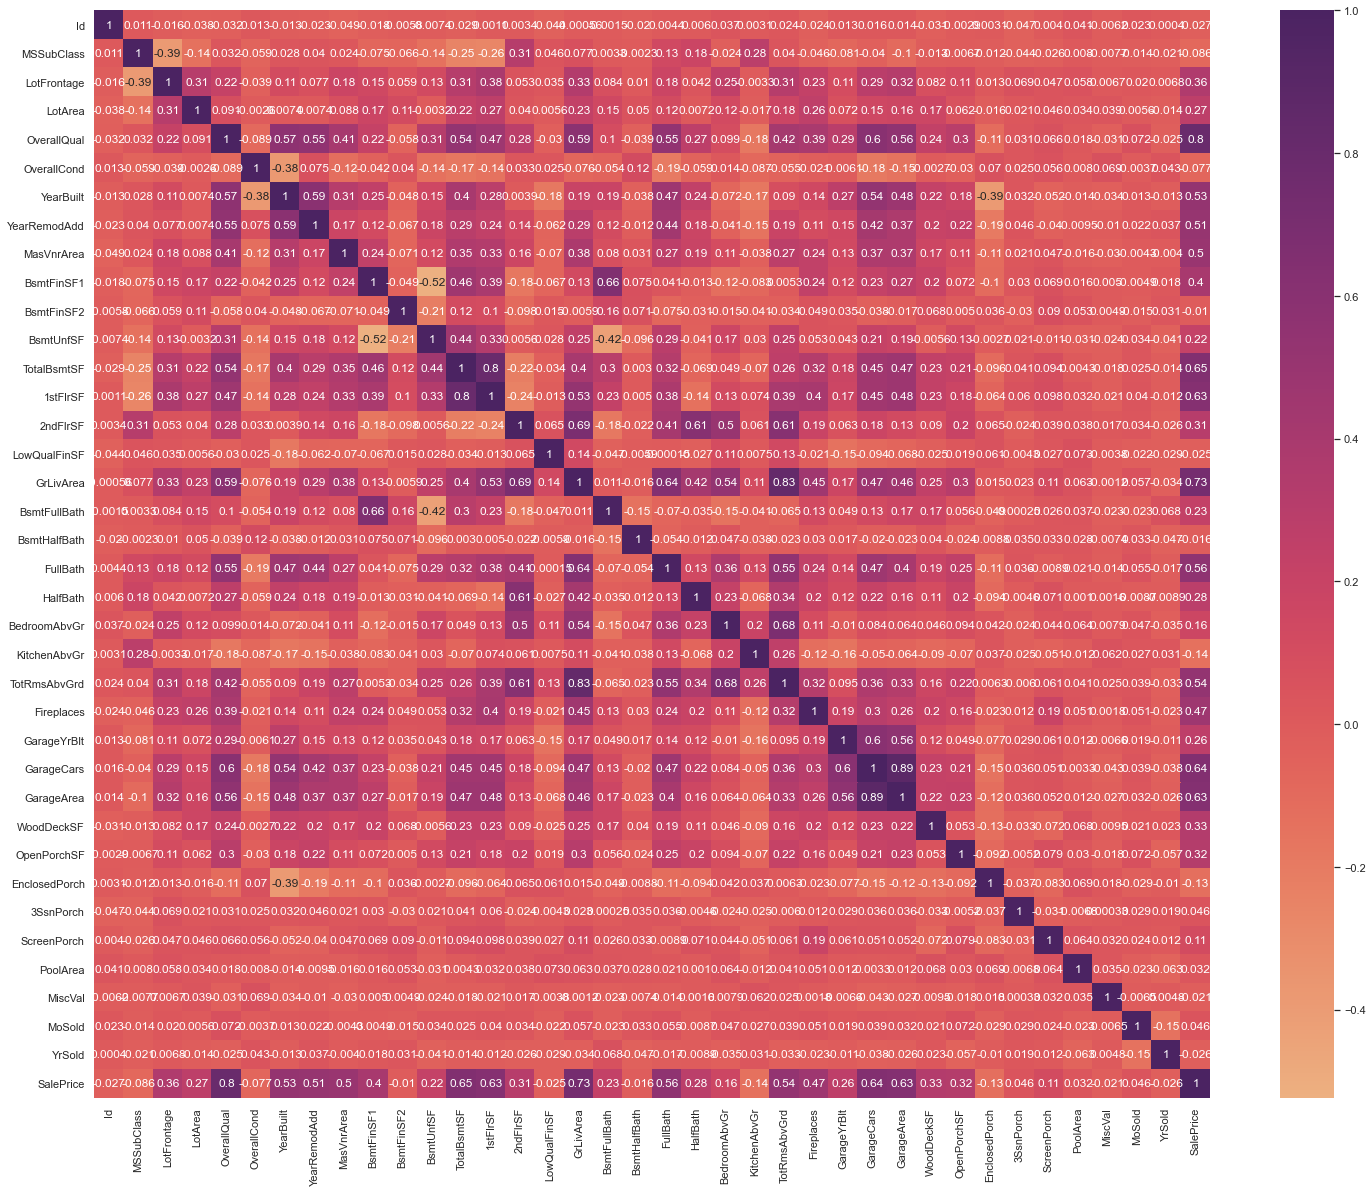

In [36]:
plt.figure(figsize = (25,20))
sns.heatmap(housingData.corr() , annot = True, cmap="flare")
plt.show()

With the above heatmap can see some strong correlation features with our target variable Sale Price such as
* OverallQual: correlation of 0.8
* GrLivArea : correlation of 0.73


we can also see that collinearity exists in various independent features. As we will be using RFE and Regularization techniques later is this analysis we wont remove the variables and let the algorithm take care of it.

* 0.83 correlation between  TotRmsAbvGrd and GrLivArea.
* 0.8 correlation between 1stFlrSF and TotalBsmtSF
* 0.89 correlation between GarageCars and GarageArea.     

Now if we look closely we can see clusters/blocks which are highly correlared with each other such as 
* Block with Garage variables GarageYrBlt, GarageArea and GarageCars, which seems obvious as well as all the variables are associated with garage
* Hence data transformation will be important before data modelling

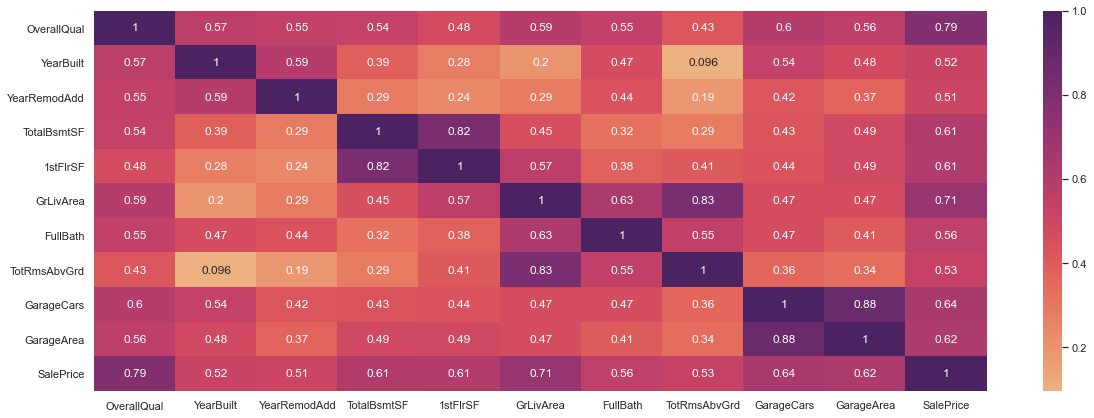

In [1182]:
correlationMatrix = housingData.corr()
# filteredCorrMatrix = correlationMatrix[(correlationMatrix >= 0.8) | (correlationMatrix <= -0.8)]
filteredCorr = correlationMatrix.index[abs(correlationMatrix['SalePrice']) >= 0.5]
plt.figure(figsize = (20,7))
sns.heatmap(housingData[filteredCorr].corr() , annot = True, cmap="flare")
plt.show()

The above Correlation Matrix has only those variables which are correlated with our target variable with more than 0.5 value.
As discussed earlier we can see that apart from target variable these features are correlated with each other as well.

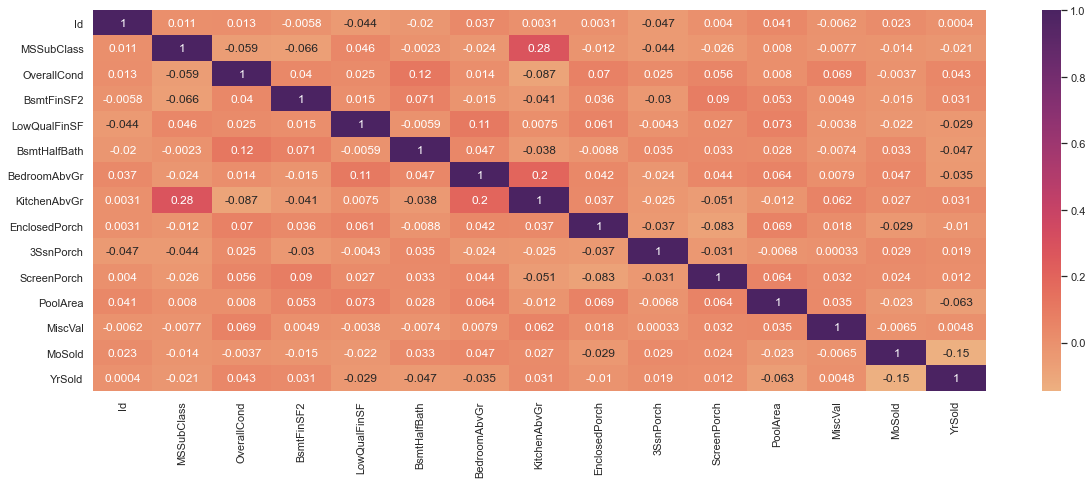

In [270]:
correlationMatrix = housingData.corr()
filteredCorr = correlationMatrix.index[abs(correlationMatrix['SalePrice']) <= 0.2]
plt.figure(figsize = (20,7))
sns.heatmap(housingData[filteredCorr].corr() , annot = True, cmap="flare")
plt.show()

The above heatmap visual is for all those variables which are least correlated with our target variable Sale Price having correlation of less than absolute value of 0.2.               
The List below is the name of these variables with there correlation value as welll

In [271]:
correlationMatrix[abs(correlationMatrix['SalePrice'] <= 0.2)]['SalePrice']

Id              -0.026883
MSSubClass      -0.086190
OverallCond     -0.076528
BsmtFinSF2      -0.010046
LowQualFinSF    -0.025426
BsmtHalfBath    -0.015864
BedroomAbvGr     0.164400
KitchenAbvGr    -0.137232
EnclosedPorch   -0.128998
3SsnPorch        0.046006
ScreenPorch      0.113493
PoolArea         0.031946
MiscVal         -0.021104
MoSold           0.045770
YrSold          -0.026044
Name: SalePrice, dtype: float64

As we know Id is just an identification number which will not be useful for our study hence it will be dropped later          
Similarly will check variance for all other variables whether they will be useful or not.

Lets check the target variable 'SalePrice' and its distribution

Skewness in the target variable : 1.7403894068058083


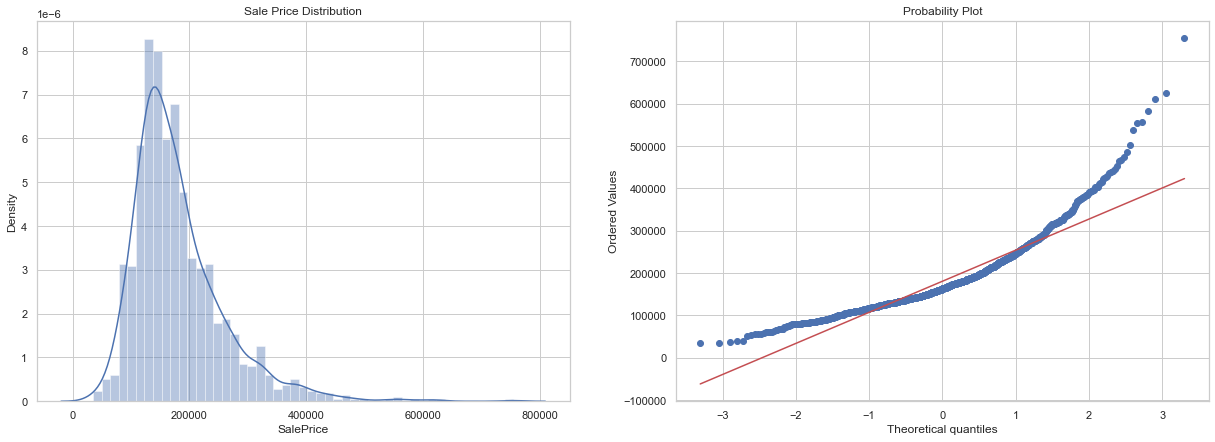

In [766]:
# Distribution and Probability plot for Sale Price

plt.figure(figsize=(21,7))
sns.set_theme(style = 'whitegrid')
plt.subplot(1,2,1)
sns.distplot(housingData['SalePrice'])
plt.title('Sale Price Distribution')
print('Skewness in the target variable :',housingData['SalePrice'].skew())
plt.subplot(1,2,2)
stats.probplot(housingData['SalePrice'], plot=plt)
plt.show()

Looking at the visuals above we can say that our target variable is right skewed and does not have normal distribution. While preparing the data for modeeling we will try to transform the target variable

#### Step 2 - Preparing the data for Data Modelling

* As we saw in the above visuals that how target variable is skewed lets try log transformation on it can check the results.
* For log tranformation we have used log1p (natural log) from numpy library

Skewness in the target variable : 0.0958506366870113


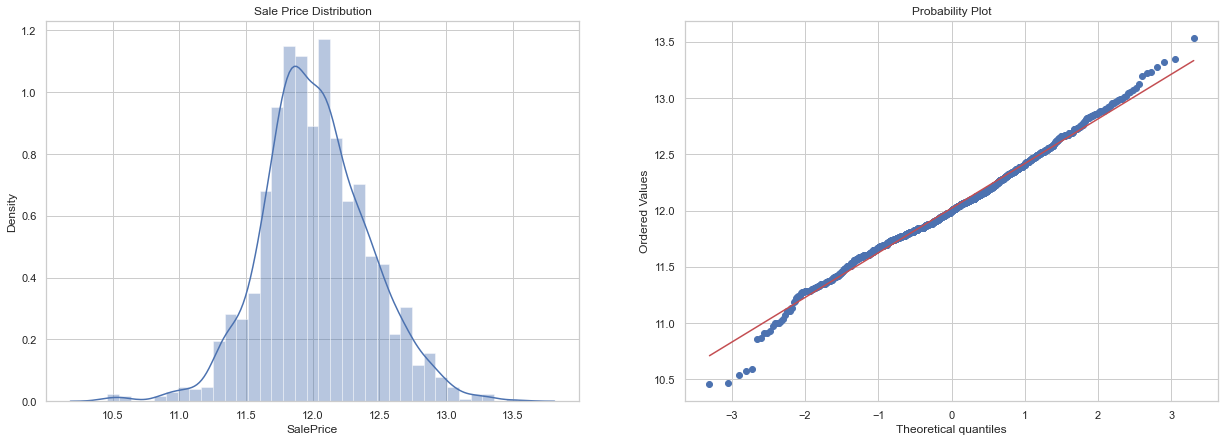

In [767]:
# Visualing log values of target variable SalePrice

plt.figure(figsize=(21,7))
sns.set_theme(style = 'whitegrid')
plt.subplot(1,2,1)
sns.distplot(np.log1p(housingData['SalePrice']))
plt.title('Sale Price Distribution')
print('Skewness in the target variable :',(np.log1p(housingData['SalePrice']).skew()))
plt.subplot(1,2,2)
stats.probplot(np.log1p(housingData['SalePrice']), plot=plt)
plt.show()

So we see that when we applied log transformation to the SalePrice variable it worked and the visual above shows us normal distribution this variable hence we will use it in out dataset

In [390]:
# new transformed target variable
housingData['SalePriceTransformed'] = np.log1p(housingData['SalePrice'])

# dropped the SalePrice variable before transformation
housingData = housingData.drop('SalePrice',axis=1)

As we transformed target variable we can also check for our predictor variables as well for data transformation before data modelling

In [391]:
# creating a list of numeric columns in our dataset
numericColumns = list(housingData.select_dtypes(include = ['int64','float64']).columns)

In [392]:
# checking for skewness in the dataset for numeric columns and sorted them in desending order
skewValueNumeric = housingData[numericColumns].apply(lambda x : skew(x)).sort_values(ascending=False)
highSkewedColumns = skewValueNumeric[skewValueNumeric>1]

# looking at columns having skewness greater than 1
highSkewedColumns

MiscVal          24.418175
PoolArea         17.504556
LotArea          12.557520
3SsnPorch        10.279262
LowQualFinSF      8.989291
KitchenAbvGr      4.476748
BsmtFinSF2        4.244209
ScreenPorch       4.139916
BsmtHalfBath      4.092601
EnclosedPorch     3.081275
MasVnrArea        2.483418
OpenPorchSF       2.337023
WoodDeckSF        1.544499
LotFrontage       1.530393
MSSubClass        1.404916
dtype: float64

* Now it isnt necessary that everytime log transformation or other transformations like sqrt, exp, reciprocal etc will work on the features we have in our dataset.
* We were able to perform log transformation on 4 features mentioned below     
GrLivArea, 1stFlrSF , LotFrontage & LotArea

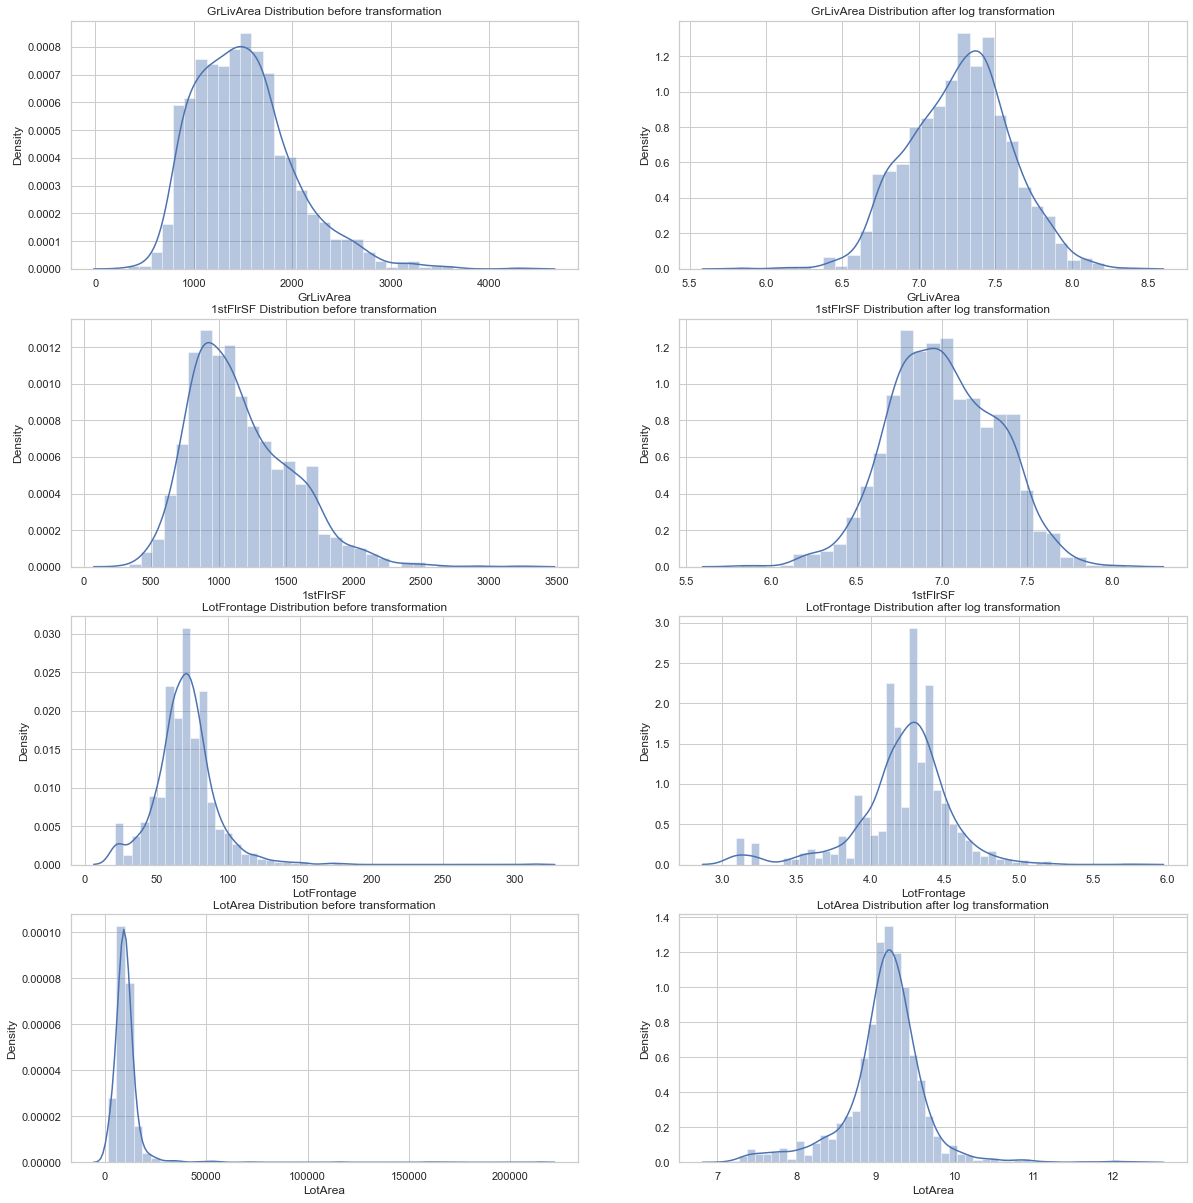

In [46]:
plt.figure(figsize=(20,21))
sns.set_theme(style = 'whitegrid')
plt.subplot(4,2,1)
sns.distplot((housingData['GrLivArea']))
plt.title('GrLivArea Distribution before transformation')
plt.subplot(4,2,2)
sns.distplot(np.log1p(housingData['GrLivArea']))
plt.title('GrLivArea Distribution after log transformation')

plt.subplot(4,2,3)
sns.distplot((housingData['1stFlrSF']))
plt.title('1stFlrSF Distribution before transformation')
plt.subplot(4,2,4)
sns.distplot(np.log1p(housingData['1stFlrSF']))
plt.title('1stFlrSF Distribution after log transformation')

plt.subplot(4,2,5)
sns.distplot((housingData['LotFrontage']))
plt.title('LotFrontage Distribution before transformation')
plt.subplot(4,2,6)
sns.distplot(np.log1p(housingData['LotFrontage']))
plt.title('LotFrontage Distribution after log transformation')

plt.subplot(4,2,7)
sns.distplot((housingData['LotArea']))
plt.title('LotArea Distribution before transformation')
plt.subplot(4,2,8)
sns.distplot(np.log1p(housingData['LotArea']))
plt.title('LotArea Distribution after log transformation')
plt.show()

Now referring to the above visual log transformation of these 4 variables to some extent was able perform good. If not completely normal distributed but still better than what we have in first place. So we will go ahead and perform log transformation on these 4 variables.

In [393]:
# data transformation
variablesToTransform = ['GrLivArea','1stFlrSF','LotFrontage','LotArea']
for i in variablesToTransform:
    housingData[i] = np.log1p(housingData[i])

In [394]:
# derived metrics
currentYear = datetime.datetime.now().year
#Age
housingData['PropertyActualAge'] = currentYear - housingData['YearBuilt']
#Age in months 
housingData['PropertyAgeWhenSoldinMonths'] = ((housingData['YrSold']-1)-(housingData['YearBuilt']))*12 + housingData['MoSold']
#Garage age
housingData['GarageActualAge'] = currentYear - housingData['GarageYrBlt']

housingData['YearsSinceRemodel'] = currentYear - housingData['YearRemodAdd']


#Total SF
housingData['totalSqrFootage'] = (housingData['BsmtFinSF1'] + housingData['BsmtFinSF2'] + housingData['1stFlrSF'] + housingData['2ndFlrSF'])
#Total Bathrooms
housingData['totalBathrooms'] = (housingData['FullBath'] + (0.5 * housingData['HalfBath']) + housingData['BsmtFullBath'] + (0.5 * housingData['BsmtHalfBath']))


#dropped the variables after generating new features
housingData = housingData.drop(['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold','MoSold','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'],axis=1)

In [395]:
# Id is just unique identification number which is not useful for the analysis hence we will drop the feature
housingData = housingData.drop('Id',axis=1)

In [396]:
#typecasting

# Converting MSSubClass to string values because there is no mathematic meaning to those numbers 
housingData['MSSubClass'] = housingData['MSSubClass'].astype('str')

* Some categorical variables are ordinal ie they have an order associated with it eg. Execellent,Good,Poor etc.
* As per the data dictionary of this dataset few of the abbreviations are given below     
Ex - Excellent     
Gd - Good
TA - Typical/Average     
Fa - Fair     
Po - Poor     
NA - No value
* These are the ordinal variables 
ExterQual,
ExterCond,
BsmtQual,
BsmtCond,
HeatingQC,
KitchenQual,
FireplaceQu,
GarageQual & 
GarageCond

In [397]:
# list of all numeric variables in the dataset
housingNumericColumns = list(housingData.select_dtypes(include = ['int64','float64']).columns)

In [398]:
# User defined function converting categorical varibales to numbers which can be later used for data modelling

def ordinalEncoding(data):
    if data == 'Ex':
        return 5
    if data == 'Gd':
        return 4
    if data == 'TA':
        return 3
    if data == 'Fa':
        return 2
    if data == 'Po':
        return 1
    else:
        return 0

In [399]:
# These are the columns which will be encoded with above user defined function
columns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual','GarageCond','PoolQC']
for col in columns:
    housingData[col] = housingData[col].map(ordinalEncoding)

In [400]:
# list of all the categorical variables in the datset for dummy variable creation
housingCategoricalColumns = list(housingData.select_dtypes(include='object').columns)

In [401]:
# As we can see below total 196 columns created for dummy variables which will be concatenated with the dataset
dummyVariables = pd.get_dummies(housingData[housingCategoricalColumns], drop_first=True)
dummyVariables

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [402]:
print('The shape of the dataset before Dummy variable creation is: ',housingData.shape)
housingData = pd.concat([housingData, dummyVariables],axis=1)
print('The shape of the dataset after Dummy variable creation is: ',housingData.shape)

The shape of the dataset before Dummy variable creation is:  (1456, 73)
The shape of the dataset after Dummy variable creation is:  (1456, 269)


In [403]:
# Splitting the data into train and test. We will use train data to train our model and test it on out test data
# train_size =0.7 means splitting the data into 70-30%

df_train , df_test = train_test_split(housingData , train_size = 0.7 , random_state = 100)

In [404]:
# Mode imputation for Electrical column which will be used for imputing in our test data also
modeImpute = df_train['Electrical'].mode()
df_train['Electrical'] = df_train['Electrical'].fillna(modeImpute)

* Before we train our model we need to Rescale our numeric independent variables to normalize the data within a particular range. It also helps in speeding up the calculations in an algorithm.
* Most of the times, collected data set contains features highly varying in magnitudes, units and range. If scaling is not done then algorithm only takes magnitude in account and not units hence incorrect modelling. To solve this issue, we have to do scaling to bring all the variables to the same level of magnitude.
* Here we have used MinMax Scalar which will bring all the numeric variables to the scale of 0 to 1
* This is the Formula for MinMaxScalar         

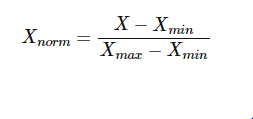

In [405]:
# rescaling the numeric columns using min-max scaler
scaler = MinMaxScaler()
df_train[housingNumericColumns] = scaler.fit_transform(df_train[housingNumericColumns])

In [406]:
# dropping the categorical columns as we have dummy variables for them
df_train = df_train.drop(housingCategoricalColumns,axis=1)

In [407]:
# performing all those steps which we did for training data

df_test['Electrical'] = df_test['Electrical'].fillna(modeImpute)
df_test[housingNumericColumns] = scaler.transform(df_test[housingNumericColumns])
df_test = df_test.drop(housingCategoricalColumns,axis=1)

#### Step 3 - Training the Model/Models

In [408]:
# creating X_train and y_train as inputs to our model training
y_train = df_train.pop('SalePriceTransformed')
X_train = df_train

# creating X_test and y_test to evaluate the trained model
y_test = df_test.pop('SalePriceTransformed')
X_test = df_test

* As we said earlier we will also be checking variannce in each column before training a model.         
* If column has no or very low variance than it will not be useful for our study and we can remove those variables         

Variance Threshold is a feature selector that removes all the low variance features from the dataset that are of no great use in modeling.     

It looks only at the features (x), not the desired outputs (y)     

Default Value of Threshold is 0     

* If Variance Threshold = 0 (Remove Constant Features )     
* If Variance Threshold > 0 (Remove Quasi-Constant Features )

For quasi-constant features, that have the same value for a very large subset, using a threshold of 0.01 would mean dropping the column where 99% of the values are similar.

In [409]:
varianceThreshold= VarianceThreshold(threshold= 0.01)
varianceThreshold.fit(X_train)

# finding non-constant features
sum(varianceThreshold.get_support())

160

In [410]:
X_train.shape #our X_train had 234 columns before removing constant/quasi-constant variables

(1019, 234)

* Quasi-constant features, as the name suggests, are the features that are almost constant. In other words, these features have the same values for a very large subset of the outputs. Such features are not very useful for making predictions. 
* We will give 0.01 as threshold in our study, which means that if the variance of the values in a column is less than 0.01, remove that column. In other words, remove feature column where approximately 99% of the values are similar.

In [411]:
# As we can see 74 features will be removed as they have very low variance

quasiConstant = [column for column in X_train.columns if column not in X_train.columns[varianceThreshold.get_support()]]
len(quasiConstant)

74

In [412]:
# Removing above columns from train and test dataset with independent features
X_train= X_train.drop(quasiConstant , axis=1)
X_test= X_test.drop(quasiConstant , axis=1)

In [413]:
X_train.shape #our X_train now 160 columns after removing constant/quasi-constant variables

(1019, 160)

Building a Basic Linear Regression Model with all the features (160) present in X_train after data cleaning

In [296]:
# We have used statsmodels right now just to check statistics of the model and get a better understanding on insignificant features
X_train_sm  = sm.add_constant(X_train) #adding a constant
baseLinearModel = sm.OLS(y_train, X_train_sm).fit()
baseLinearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     SalePriceTransformed   R-squared:                       0.949
Model:                              OLS   Adj. R-squared:                  0.939
Method:                   Least Squares   F-statistic:                     101.7
Date:                  Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                          09:26:07   Log-Likelihood:                 2130.4
No. Observations:                  1019   AIC:                            -3945.
Df Residuals:                       861   BIC:                            -3166.
Df Model:                           157                                         
Covariance Type:              nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3087      0.065     -4.779      0.000      -0.435      -0.182
LotFrontage                     0.0400      0.013      3.119      0.002       0.015       0.065
OverallQual                     0.1160      0.015      7.724      0.000       0.087       0.146
OverallCond                     0.0906      0.010      8.643      0.000       0.070       0.111
MasVnrArea                      0.0163      0.012      1.377      0.169      -0.007       0.040
ExterQual                      -0.0003      0.004     -0.085      0.932      -0.007       0.007
ExterCond                      -0.0049      0.004     -1.370      0.171      -0.012       0.002
BsmtQual                        0.0053      0.003      1.679      0.093      -0.001       0.011
BsmtCond                        0.0020      0.004      0.479      0.632      -0.006       0.010
BsmtUnfSF                       0.0309      0.025      1.252      0.211      -0.018       0.079
TotalBsmtSF                     0.0657      0.032      2.034      0.042       0.002       0.129
HeatingQC                       0.0014      0.002      0.838      0.402      -0.002       0.005
GrLivArea                       0.3060      0.031      9.994      0.000       0.246       0.366
BedroomAbvGr                   -0.0330      0.018     -1.785      0.075      -0.069       0.003
KitchenAbvGr                   -0.0407      0.022     -1.869      0.062      -0.084       0.002
KitchenQual                     0.0058      0.003      2.150      0.032       0.001       0.011
TotRmsAbvGrd                    0.0306      0.019      1.592      0.112      -0.007       0.068
Fireplaces                      0.0065      0.011      0.567      0.571      -0.016       0.029
FireplaceQu                     0.0021      0.001      1.545      0.123      -0.001       0.005
GarageCars                      0.0290      0.016      1.814      0.070      -0.002       0.060
GarageArea                      0.0459      0.019      2.402      0.016       0.008       0.083
GarageQual                      0.0066      0.006      1.054      0.292      -0.006       0.019
GarageCond                      0.0044      0.006      0.688      0.492      -0.008       0.017
WoodDeckSF                      0.0262      0.009      2.905      0.004       0.008       0.044
OpenPorchSF                     0.0201      0.010      1.984      0.048       0.000       0.040
EnclosedPorch                   0.0131      0.011      1.163      0.245      -0.009       0.035
ScreenPorch                     0.0165      0.008      2.062      0.040       0.001       0.032
PoolQC                         -0.0032      0.008     -0.376      0.707      -0.020       0.013
PropertyActualAge               0.0458      0.121      0.379      0.705      -0.191  

Looking at the statistical summary of this linear regression model we can see that there are many insignificant variables which have p-value > 0.05.

* This is a summary statistics above for a linear model where we took all the variables in consideration and built a model.
* We need to look at two values while considering a model good enough. p-Value of the predictor variables and second is Multicollinearity of predictors with each other which we can calculate using VIF.
* Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.
* Generally if p-Value > 0.05 for a variable then it is considered insignificant for that model.
* VIF > 5 or 10 (depends on study) is high multicollinearity of that specific variable with others and hence such variables become redunctant for the model and can be removed.
* We will also check R-squared. R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
* R-squared ranges from 0-1 or 0-100%

In [297]:
# Lets calculate some metrics such as R2 score, RSS MSE and RMSE

X_test_sm = sm.add_constant(X_test)
y_pred_train = baseLinearModel.predict(X_train_sm)
y_pred_test = baseLinearModel.predict(X_test_sm)

metric = []
r2ScoreTrain = r2_score(y_train, y_pred_train)
print('Train - r2 Score:',r2ScoreTrain)
metric.append(r2ScoreTrain)

r2ScoreTest = r2_score(y_test, y_pred_test)
print('Test - r2 Score:',r2ScoreTest)
metric.append(r2ScoreTest)

rssTrain = np.sum(np.square(y_train - y_pred_train))
print('Train - Residual Sum of Squares:',rssTrain)
metric.append(rssTrain)

rssTest = np.sum(np.square(y_test - y_pred_test))
print('Test - Residual Sum of Squares:',rssTest)
metric.append(rssTest)

mseTrain = mean_squared_error(y_train, y_pred_train)
print('Train - Mean Squared Error:',mseTrain)
metric.append(mseTrain)

mseTest = mean_squared_error(y_test, y_pred_test)
print('Test - Mean Squared Error:',mseTest)
metric.append(mseTest)

rmseTrain = np.sqrt(mseTrain)
print('Train - Root Mean Squared Error (RMSE):',rmseTrain)
metric.append(rmseTrain)

rmseTest = np.sqrt(mseTest)
print('Test - Root Mean Squared Error (RMSE):',rmseTest)
metric.append(rmseTest)

Train - r2 Score: 0.9488266422478223
Test - r2 Score: 0.8889306019181835
Train - Residual Sum of Squares: 0.9114355835887373
Test - Residual Sum of Squares: 0.7291982101280723
Train - Mean Squared Error: 0.0008944412007740307
Test - Mean Squared Error: 0.0016686457897667557
Train - Root Mean Squared Error (RMSE): 0.029907209846022593
Test - Root Mean Squared Error (RMSE): 0.04084906106346577


Looking at the metrics above we can say that the model is overfitting as the train and test score has a difference of more than 5%. We have used 160 features for theis base linear regression model.          
We will go ahead and use RFE for feature selection to make the model more generalised.

In [83]:
def VIF(data):
    vif = pd.DataFrame()
    vif['features'] = data.columns
    vif['vif'] = [variance_inflation_factor(data.values , i ) for i in range(len(data.columns))]
    vif = vif.sort_values(by = 'vif' , ascending = False)
    return vif
VIF(X_train)

,features,vif
145,GarageFinish_No Garage,inf
144,GarageType_No Garage,inf
42,MSSubClass_90,inf
83,BldgType_Duplex,inf
34,MSSubClass_190,inf
...,...,...
80,Condition1_PosN,1.488735
157,SaleCondition_Family,1.362397
25,ScreenPorch,1.360306
55,LotConfig_FR2,1.346093


Looking at the table above there are many variables correlated with each other. Multi-collinearity is one of the problems which needs to be treated while working with linear regression.

#### Using Automatic Approach Recursive Feature Elimination (RFE)       
Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.               
                               
RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.                         
* ref.support_  - returns an array with boolean values to indicate whether an attribute was selected using RFE e.g [False True True True]
* ref.ranking_  - returns an array with positive integer values to indicate the attribute ranking with a lower score indicating a higher ranking e.g. [2 1 1 1 3 4]

In [414]:
# we have currently 160 features lets use RFE and check top n features in the dataset which can be used for further analysis
linear = LinearRegression()
linear.fit(X_train, y_train)
# # fitting the linear model to RFE and also taking top 75 features from the data
rfe = RFE(linear, n_features_to_select = 75)
rfe = rfe.fit(X_train, y_train)

In [415]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', False, 79),
 ('ExterCond', False, 25),
 ('BsmtQual', False, 27),
 ('BsmtCond', False, 55),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 65),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 16),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('FireplaceQu', False, 61),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('GarageQual', False, 12),
 ('GarageCond', False, 48),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolQC', False, 59),
 ('PropertyActualAge', False, 13),
 ('PropertyAgeWhenSoldinMonths', True, 1),
 ('GarageActualAge', True, 1),
 ('YearsSinceRemodel', True, 1),
 ('totalSqrFootage', True, 1),
 ('totalBathrooms', True, 1),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_190', True, 1),
 ('MSSubCla

* Now we can see that here we chose top 75 features and RFE gave us a list of variables but this is a manual approach as we have to mention how many features we want
* We also dont know which feature combination might work best for data modelling
* Can use GridSearchCV but there are so many features right now, 159 features. 
* Here we will use cross validation approach and sklearn has RFECV which is RFE with cross validation 
* Recursive Feature Elimination With Cross-Validation indicates the features which are important with importance ranking. This enables us to build the model with optimal dimensions.
* RFECV identifies the best features by eliminating the lesser important or redundant features in steps along with cross-validation                       
In RFECV we need to mention parameters such as          
* estimator - A supervised learning estimator with a fit method                               
* min_features_to_select - The minimum number of features to be selected                               
* scoring - Method such as Negative MSE or R2                 
* cv - Determines the cross-validation splitting strategy    

In [416]:
# fitting the linear model to RFECV to get the best optimum features 

rfecv = RFECV(estimator=LinearRegression(),min_features_to_select=5,n_jobs=-1,scoring="neg_mean_absolute_error",cv=5)
rfecv.fit(X_train,y_train)

# Taking only those columns suggested by RFECV
columns = X_train.columns[rfecv.support_]
X_train_rfe = X_train[columns]

In [417]:
len(columns)

54

Initially when we started data modelling X_train had come down to 160 features and now after using RFE with Cross Validation we are down to the best optimal 54 features present in our dataset. Lets push these features for data modelling

In [418]:
# Model building again with the features suggested by RFECV
linear = LinearRegression()
linear.fit(X_train_rfe, y_train)

# Taking only those columns suggested by RFECV for test data as well
X_test_rfe = X_test[columns]

In [419]:
# Lets calculate some metrics such as R2 score, RSS MSE and RMSE
y_pred_train = linear.predict(X_train_rfe)
y_pred_test = linear.predict(X_test_rfe)

r2ScoreTrain = r2_score(y_train, y_pred_train)
print('Train - r2 Score:',r2ScoreTrain)

r2ScoreTest = r2_score(y_test, y_pred_test)
print('Test - r2 Score:',r2ScoreTest)

rmseTrain = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('Train - Root Mean Squared Error (RMSE):',rmseTrain)

rmseTest = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Test - Root Mean Squared Error (RMSE):',rmseTest)

Train - r2 Score: 0.9410699663474535
Test - r2 Score: 0.8879024465975072
Train - Root Mean Squared Error (RMSE): 0.032093884505948085
Test - Root Mean Squared Error (RMSE): 0.04103769282076547


* Above are the results for linear model using RFECV    
* RMSE is as low as 0.0408 which is good                    
* The model is slightly overfitting as our train r2 Score is 0.94 and test r2 Score is 0.88 as the difference between them is more than 5%. Lets tune this model more efficient and tune it using Ridge on RFE                    
* If we notice we have come down from 160 features which we had in our basic linear regression to 54 features after applying RFECV and there is no significant drop in our r2 Score or increase in RMSE as well hence it was a good technique to use and simplify the model by removing features.

#### Step 4 - Tuning with Regularization (Ridge & Lasso) & Prediction

What makes regression model more effective is its ability of regularizing. The term "regularizing" stands for models ability to structurally prevent overfitting by imposing a penalty on the coefficients.       
                 
We have used two types of regularizations.                 

* Ridge
* Lasso

These regularization methods work by penalizing the magnitude of the coefficients of features and at the same time minimizing the error between the predicted value and actual observed values. This minimization becomes a balance between the error (the difference between the predicted value and observed value) and the size of the coefficients. The only difference between Ridge and Lasso is the way they penalize the coefficients.

#### Ridge Regression               
This regression adds penalty equivalent to the square of the magnitude of the coefficients. This penalty is added to the least square loss function and looks like    

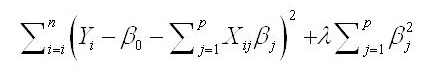              
* λ - is the hyperparameter alpha/lambda 
* The square of the magnitude of the coefficients

In [420]:
# to find the optimum value of alpha/lambda 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# params = {'alpha': list(np.arange(0, 11, 0.01))}

ridge = Ridge()

# k fold cross validation with 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

RidgeModel_cv = GridSearchCV(estimator = ridge,param_grid = params,scoring= 'neg_mean_absolute_error', cv = kfold ,return_train_score=True,verbose = 1) 

RidgeModel_cv.fit(X_train_rfe,y_train)

# Lets check the optimal alpha value suggested by the ridge model giving least error
print(RidgeModel_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.3}


In [421]:
# using the best estimator suggested by the Ridge and checking for results
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe,y_train)

# taking only the columns which we have used in train data
X_test_rfe = X_test[columns]

In [422]:
# Lets calculate some metrics such as R2 score, RSS MSE and RMSE

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2ScoreTrain = r2_score(y_train, y_pred_train)
print('Train - r2 Score:',r2ScoreTrain)
metric2.append(r2ScoreTrain)

r2ScoreTest = r2_score(y_test, y_pred_test)
print('Test - r2 Score:',r2ScoreTest)
metric2.append(r2ScoreTest)

rssTrain = np.sum(np.square(y_train - y_pred_train))
print('Train - Residual Sum of Squares:',rssTrain)
metric2.append(rssTrain)

rssTest = np.sum(np.square(y_test - y_pred_test))
print('Test - Residual Sum of Squares:',rssTest)
metric2.append(rssTest)

mseTrain = mean_squared_error(y_train, y_pred_train)
print('Train - Mean Squared Error:',mseTrain)
metric2.append(mseTrain)

mseTest = mean_squared_error(y_test, y_pred_test)
print('Test - Mean Squared Error:',mseTest)
metric2.append(mseTest)

rmseTrain = np.sqrt(mseTrain)
print('Train - Root Mean Squared Error (RMSE):',rmseTrain)
metric2.append(rmseTrain)

rmseTest = np.sqrt(mseTest)
print('Test - Root Mean Squared Error (RMSE):',rmseTest)
metric2.append(rmseTest)

Train - r2 Score: 0.9404650814751546
Test - r2 Score: 0.8970915615787073
Train - Residual Sum of Squares: 1.0603612034289702
Test - Residual Sum of Squares: 0.6756194811518177
Train - Mean Squared Error: 0.001040589993551492
Test - Mean Squared Error: 0.0015460400026357385
Train - Root Mean Squared Error (RMSE): 0.03225817715791597
Test - Root Mean Squared Error (RMSE): 0.03931971519016559


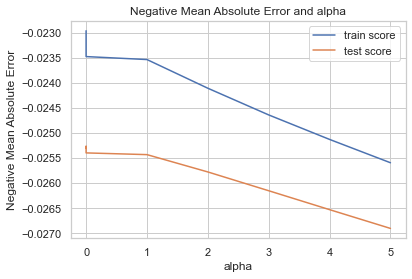

In [330]:
# lets plot the Negative Mean absolute Error with the alpha values
ridgeResults = pd.DataFrame(RidgeModel_cv.cv_results_)
ridgeResults = ridgeResults[ridgeResults['param_alpha']<=5]
ridgeResults['param_alpha'] = ridgeResults['param_alpha'].astype('int32')

# plotting the mean train score and mean test score 
plt.plot(ridgeResults['param_alpha'], ridgeResults['mean_train_score'])
plt.plot(ridgeResults['param_alpha'], ridgeResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In the above Visual we can see that till alpha = 1 the error is almost constant and then there is an increase in the error in both Train and Test.
Lets check the r2 score and RMSE values for different values of alpha till 1

In [424]:
# here we can created list to store the r2 values and RMSE values for different alpha and then later we can compare
r2trainList,r2testList = [],[]
rmsetrainList,rmsetestList = [],[]

# these are the alpha vlaues from 0.1 to 1
alphaList = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for alpha in alphaList:
    ridge2 = Ridge(alpha=alpha)
    ridge2.fit(X_train_rfe,y_train)
    X_test_rfe = X_test[columns]
    #prediction
    y_pred_train = ridge2.predict(X_train_rfe)
    y_pred_test = ridge2.predict(X_test_rfe)

    # After prediction now checking for metrics
    #r2Score
    r2ScoreTrain = r2_score(y_train, y_pred_train)
    r2trainList.append(r2ScoreTrain)

    r2ScoreTest = r2_score(y_test, y_pred_test)
    r2testList.append(r2ScoreTest)
    
    #RMSE
    rmseTrain = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmsetrainList.append(rmseTrain)

    rmseTest = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmsetestList.append(rmseTest)

In [425]:
# creating a dataframe to visualise and compare the metrics 

alphaEvaluationTable = {'Alpha Values': ['0,1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']}
alphaMetric = pd.DataFrame(alphaEvaluationTable,columns = ['Alpha Values'] )
r2Train = pd.Series(r2trainList, name = 'R2 Score (Train)')
r2test = pd.Series(r2testList, name = 'R2 Score (Test)')
rmseTrain = pd.Series(rmsetrainList, name = 'RMSE (Train)')
rmseTest = pd.Series(rmsetestList, name = 'RMSE (Test)')
# final metric to compare
finalAlphaMetric = pd.concat([alphaMetric,r2Train, r2test, rmseTrain,rmseTest], axis = 1)

finalAlphaMetric

,Alpha Values,R2 Score (Train),R2 Score (Test),RMSE (Train),RMSE (Test)
0,"0,1",0.940960,0.892629,0.032124,0.040163
1,0.2,0.940735,0.895373,0.032185,0.039647
2,0.3,0.940465,0.897092,0.032258,0.039320
3,0.4,0.940176,0.898220,0.032336,0.039104
4,0.5,0.939878,0.898980,0.032417,0.038957
5,0.6,0.939576,0.899498,0.032498,0.038857
6,0.7,0.939275,0.899848,0.032579,0.038790
7,0.8,0.938974,0.900078,0.032660,0.038745
8,0.9,0.938675,0.900219,0.032739,0.038718
9,1.0,0.938379,0.900295,0.032818,0.038703


The above Table gives us an insight of different r2 values and RMSE of alpha ranging from 0.1 to 1
* If we check alpha = 0.8 we are getting a good r2 value of both train and test which are very close to each other as well
* Train accuracy being 0.938 and test accuracy being 0.90
* RMSE values train - 0.032 and for test - 0.038
* Comparing 0.8 alpha with the alpha value of 0.3 suggested to us. With alpha 0.8 our test RMSE has slighly decreases and train RMSE almost remains the same.
* Difference between the r2 score between train and test has also decreased when 0.8 alpha is used. Hence we will go ahead and use 0.8 ahead.

In [426]:
# using the best estimator suggested by the Ridge and checking for results
alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe,y_train)

# taking only the columns which we have used in train data
X_test_rfe = X_test[columns]

In [427]:
# Lets calculate some metrics such as R2 score, RSS MSE and RMSE

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2ScoreTrain = r2_score(y_train, y_pred_train)
print('Train - r2 Score:',r2ScoreTrain)
metric2.append(r2ScoreTrain)

r2ScoreTest = r2_score(y_test, y_pred_test)
print('Test - r2 Score:',r2ScoreTest)
metric2.append(r2ScoreTest)

rssTrain = np.sum(np.square(y_train - y_pred_train))
print('Train - Residual Sum of Squares:',rssTrain)
metric2.append(rssTrain)

rssTest = np.sum(np.square(y_test - y_pred_test))
print('Test - Residual Sum of Squares:',rssTest)
metric2.append(rssTest)

mseTrain = mean_squared_error(y_train, y_pred_train)
print('Train - Mean Squared Error:',mseTrain)
metric2.append(mseTrain)

mseTest = mean_squared_error(y_test, y_pred_test)
print('Test - Mean Squared Error:',mseTest)
metric2.append(mseTest)

rmseTrain = np.sqrt(mseTrain)
print('Train - Root Mean Squared Error (RMSE):',rmseTrain)
metric2.append(rmseTrain)

rmseTest = np.sqrt(mseTest)
print('Test - Root Mean Squared Error (RMSE):',rmseTest)
metric2.append(rmseTest)

Train - r2 Score: 0.9389738574277963
Test - r2 Score: 0.900077592220652
Train - Residual Sum of Squares: 1.0869210134466707
Test - Residual Sum of Squares: 0.6560154476637661
Train - Mean Squared Error: 0.001066654576493298
Test - Mean Squared Error: 0.0015011795141047278
Train - Root Mean Squared Error (RMSE): 0.03265967814436171
Test - Root Mean Squared Error (RMSE): 0.03874505793136368


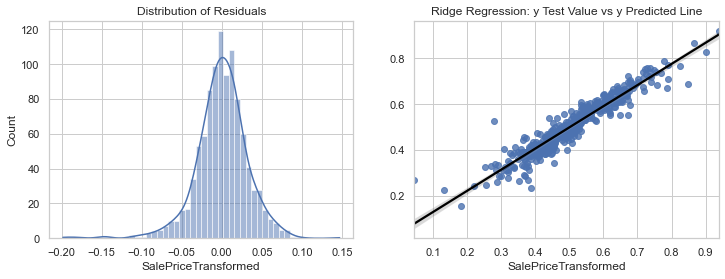

In [378]:
# Residuals are the error we got ie. the difference between the actual value and the predicted value
residual = y_train - y_pred_train 

# lets check visually how the ridge model is performing 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residual,kde=True)
plt.title('Distribution of Residuals')
plt.subplot(1,2,2)
sns.regplot(x = y_test , y = y_pred_test , line_kws={'color' : 'black'})
plt.title('Ridge Regression: y Test Value vs y Predicted Line')
plt.show()

1st Visual - In order to make valid inferences from our regression, the residuals of the regression should follow a normal distribution.Our distribution plot for residuals show normal distribution.

2nd Visual - The blue values/dots are the ytest values present in our data and the black line in the ridge model predicting the values

#### Lasso Regression          
Lasso adds penalty equivalent to the absolute value of the sum of coefficients. This penalty is added to the least square loss function and replaces the squared sum of coefficients from Ridge.
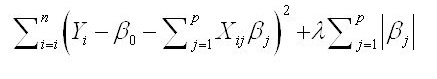         

* λ - is the hyperparameter alpha/lambda 
* The absolute sum of the coefficients used

In [428]:
# to find the optimum value of alpha/lambda 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# kfold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

LassoModel_cv = GridSearchCV(estimator = lasso,param_grid = params,scoring= 'neg_mean_absolute_error', cv = kfold,return_train_score=True,verbose = 1) 

LassoModel_cv.fit(X_train,y_train)

# Lets check the optimal alpha value suggested by the lasso model giving least error
print(LassoModel_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


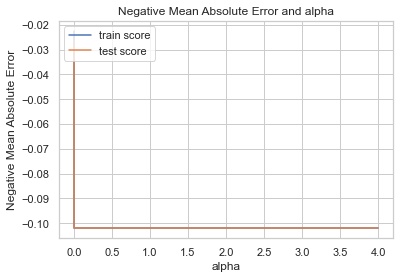

In [350]:
lassoResults = pd.DataFrame(LassoModel_cv.cv_results_)
lassoResults = lassoResults[lassoResults['param_alpha']<=4]
lassoResults['param_alpha'] = lassoResults['param_alpha'].astype('int32')

# plotting
plt.plot(lassoResults['param_alpha'], lassoResults['mean_train_score'])
plt.plot(lassoResults['param_alpha'], lassoResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

With a slight increase in alpha value in lasso the negative mean absolute error will increase

In [429]:
# using the best estimator suggested by the Lasso and checking for results
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)

# Predicting y values on train and test data to check accuracy and RMSE for model evaluation
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [430]:
# Lets calculate some metrics such as R2 score, RSS MSE and RMSE

metric3 = []
r2ScoreTrain = r2_score(y_train, y_pred_train)
print('Train - r2 Score:',r2ScoreTrain)
metric3.append(r2ScoreTrain)

r2ScoreTest = r2_score(y_test, y_pred_test)
print('Test - r2 Score:',r2ScoreTest)
metric3.append(r2ScoreTest)

rssTrain = np.sum(np.square(y_train - y_pred_train))
print('Train - Residual Sum of Squares:',rssTrain)
metric3.append(rssTrain)

rssTest = np.sum(np.square(y_test - y_pred_test))
print('Test - Residual Sum of Squares:',rssTest)
metric3.append(rssTest)

mseTrain = mean_squared_error(y_train, y_pred_train)
print('Train - Mean Squared Error:',mseTrain)
metric3.append(mseTrain)

mseTest = mean_squared_error(y_test, y_pred_test)
print('Test - Mean Squared Error:',mseTest)
metric3.append(mseTest)

rmseTrain = np.sqrt(mseTrain)
print('Train - Root Mean Squared Error (RMSE):',rmseTrain)
metric3.append(rmseTrain)

rmseTest = np.sqrt(mseTest)
print('Test - Root Mean Squared Error (RMSE):',rmseTest)
metric3.append(rmseTest)

Train - r2 Score: 0.9420549196999275
Test - r2 Score: 0.905762344714468
Train - Residual Sum of Squares: 1.0320450015251428
Test - Residual Sum of Squares: 0.6186936343191198
Train - Mean Squared Error: 0.0010128017679343893
Test - Mean Squared Error: 0.001415774906908741
Train - Root Mean Squared Error (RMSE): 0.0318245466257477
Test - Root Mean Squared Error (RMSE): 0.03762678443487752


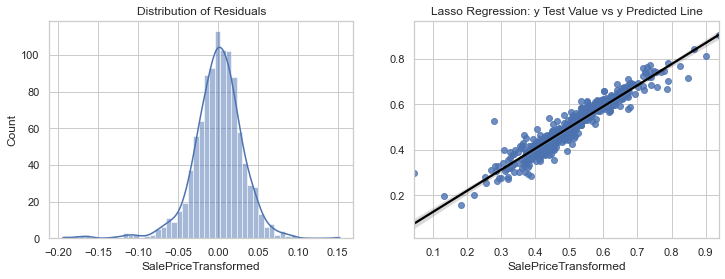

In [231]:
# Residuals are the error we got ie. the difference between the actual value and the predicted value
residual = y_train - y_pred_train 

# lets check visually how the ridge model is performing 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residual,kde=True)
plt.title('Distribution of Residuals')
plt.subplot(1,2,2)
sns.regplot(x = y_test , y = y_pred_test , line_kws={'color' : 'black'})
plt.title('Lasso Regression: y Test Value vs y Predicted Line')
plt.show()

1st Visual - In order to make valid inferences from our regression, the residuals of the regression should follow a normal distribution.Our distribution plot for residuals show normal distribution.

2nd Visual - The blue values/dots are the ytest values present in our data and the black line in the lasso model predicting the values

#### Step 5 - Model Evaluation and Comparision

In [431]:
# creating a table to compare metrics of different models
modelEvaluationTable = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'],'Linear Regression': metric}
linearMetric = pd.DataFrame(modelEvaluationTable,columns = ['Metric', 'Linear Regression'] )

ridgeMetric = pd.Series(metric2, name = 'Ridge Regression-RFE')
lassoMetric = pd.Series(metric3, name = 'Lasso Regression')

finalMetric = pd.concat([linearMetric, ridgeMetric, lassoMetric], axis = 1)

finalMetric

,Metric,Linear Regression,Ridge Regression-RFE,Lasso Regression
0,R2 Score (Train),0.948827,0.938974,0.942055
1,R2 Score (Test),0.888931,0.900078,0.905762
2,RSS (Train),0.911436,1.086921,1.032045
3,RSS (Test),0.729198,0.656015,0.618694
4,MSE (Train),0.000894,0.001067,0.001013
5,MSE (Test),0.001669,0.001501,0.001416
6,RMSE (Train),0.029907,0.032660,0.031825
7,RMSE (Test),0.040849,0.038745,0.037627


In [355]:
lassoCoef= pd.Series(lasso.coef_, index= X_train.columns)
significantFeatures= len(lassoCoef[lassoCoef != 0])
print('All features present in Basic Linear Regression Model:', len(X_train.columns))
print('Optimum Features selected by Lasso Regression Model:', significantFeatures)
print('Optimum Features present in Ridge Regression Model with RFE:', len(X_train_rfe.columns))

All features present in Basic Linear Regression Model: 160
Optimum Features selected by Lasso Regression Model: 106
Optimum Features present in Ridge Regression Model with RFE: 54


Now there are few things to notice:      
* If we compare r2 Score Lasso seems to perform better than rest of the models
* Generalised models are always better than complex models             
* If we compare the above 3 models and there metrics Ridge Regression model has the least number of features and is much less complex than the basic linear model which is trained with 160 features and the lasso model which with the help of feature selection used 106 features.
* Ridge regression with RFE method is trained on 54 variables and has a decent r2 Score and very low RMSE as well

Lets also check the top features which we have got from our Ridge and Lasso Model along with their coefficient values         
* ridge.coef_ and lasso.coef_ is used to check the coefficient values 

In [432]:
# Ridge Variables and coefficients

ridgeParamters = list(ridge.coef_)
ridgeCol = X_train_rfe.columns
ridgeModelCoeff = list(zip(ridgeCol,ridgeParamters))
ridgeModelDf = pd.DataFrame(ridgeModelCoeff)
ridgeModelDf.columns = ['ridgeVariables' , 'ridgeCoefficients']
ridgeModelDf = ridgeModelDf.sort_values(by='ridgeCoefficients',ascending=False,key=abs).reset_index(drop=True)


# Lasso Variables and coefficients

lassoParamters = list(lasso.coef_)
lassoCol = X_train.columns
lassoModelCoeff = list(zip(lassoCol,lassoParamters))
lassoModelDf = pd.DataFrame(lassoModelCoeff)
lassoModelDf.columns = ['lassoVariables' , 'lassoCoefficients']
lassoModelDf = lassoModelDf.sort_values(by='lassoCoefficients',ascending=False,key=abs).reset_index(drop=True)

# Lets visualise the variables for both the models

ridgelassoFeatures = pd.concat([ridgeModelDf,lassoModelDf],axis=1)
ridgelassoFeatures.head(10)

,ridgeVariables,ridgeCoefficients,lassoVariables,lassoCoefficients
0,GrLivArea,0.241145,GrLivArea,0.301773
1,OverallQual,0.155136,OverallQual,0.131078
2,TotalBsmtSF,0.153906,TotalBsmtSF,0.095186
3,MSZoning_FV,0.104152,OverallCond,0.086983
4,PropertyAgeWhenSoldinMonths,-0.086881,totalSqrFootage,0.077744
5,OverallCond,0.086079,MSZoning_FV,0.055566
6,totalSqrFootage,0.081630,PropertyAgeWhenSoldinMonths,-0.053337
7,MSZoning_RL,0.080908,MSZoning_RL,0.047564
8,MSZoning_RH,0.079370,Neighborhood_Crawfor,0.037541
9,SaleType_New,0.071449,MSZoning_RH,0.037373


These are the top 10 variables with there respective coefficient values which our ridge and lasso regression model has suggested

* What can we interpret looking at these variables and coefficient values 
* Interpretation of coefficient means that a unit increase in an independent variable keeping all other constant will increase/decrease the dependent variable by its coefficient value.
* Example if there is a unit increase in 'GrLivArea' keeping rest of the variables constant then the Sale Price will increase by 0.241145 in ridge model and 0.301773 in lasso model.
* Simillarly if there is a unit increase in 'PropertyAgeWhenSoldinMonths' keeping rest of the variables constant then the Sale Price will decrease by 0.0868 in Ridge model and by 0.053 in Lasso model. This means this variable is negatively correlated with our target variable.

#### Please ignore the code below as it is for the Subjective Questions. The ouput below is also mentioned in the pdf file submitted for this assignment as well. 

Alpha value         
Ridge : 0.8                             
Lasso : 0.0001

Lets see what happens if we double the value of alpha

In [433]:
# Question 1

alpha = 1.6 #double of 0.8
ridgeDouble = Ridge(alpha=alpha)

ridgeDouble.fit(X_train_rfe,y_train)
y_pred_trainDouble = ridgeDouble.predict(X_train_rfe)
y_pred_testDouble = ridgeDouble.predict(X_test_rfe)

metricDouble =[]
r2ScoreTrain = r2_score(y_train, y_pred_trainDouble)
print('Train - r2 Score:',r2ScoreTrain)
metricDouble.append(r2ScoreTrain)

r2ScoreTest = r2_score(y_test, y_pred_testDouble)
print('Test - r2 Score:',r2ScoreTest)
metricDouble.append(r2ScoreTest)

rssTrain = np.sum(np.square(y_train - y_pred_trainDouble))
print('Train - Residual Sum of Squares:',rssTrain)
metricDouble.append(rssTrain)

rssTest = np.sum(np.square(y_test - y_pred_testDouble))
print('Test - Residual Sum of Squares:',rssTest)
metricDouble.append(rssTest)

mseTrain = mean_squared_error(y_train, y_pred_trainDouble)
print('Train - Mean Squared Error:',mseTrain)
metricDouble.append(mseTrain)

mseTest = mean_squared_error(y_test, y_pred_testDouble)
print('Test - Mean Squared Error:',mseTest)
metricDouble.append(mseTest)

rmseTrain = np.sqrt(mseTrain)
print('Train - Root Mean Squared Error (RMSE):',rmseTrain)
metricDouble.append(rmseTrain)

rmseTest = np.sqrt(mseTest)
print('Test - Root Mean Squared Error (RMSE):',rmseTest)
metricDouble.append(rmseTest)

Train - r2 Score: 0.9366702312532651
Test - r2 Score: 0.8999874490796865
Train - Residual Sum of Squares: 1.1279503099200827
Test - Residual Sum of Squares: 0.6566072597936825
Train - Mean Squared Error: 0.0011069188517370781
Test - Mean Squared Error: 0.0015025337752715847
Train - Root Mean Squared Error (RMSE): 0.03327039001480262
Test - Root Mean Squared Error (RMSE): 0.03876253055815093


In [434]:
alpha = 0.0002
lassoDouble = Lasso(alpha=alpha)

lassoDouble.fit(X_train,y_train)
y_pred_trainDouble = lassoDouble.predict(X_train)
y_pred_testDouble = lassoDouble.predict(X_test)

metricDouble1 =[]
r2ScoreTrain = r2_score(y_train, y_pred_trainDouble)
print('Train - r2 Score:',r2ScoreTrain)
metricDouble1.append(r2ScoreTrain)

r2ScoreTest = r2_score(y_test, y_pred_testDouble)
print('Test - r2 Score:',r2ScoreTest)
metricDouble1.append(r2ScoreTest)

rssTrain = np.sum(np.square(y_train - y_pred_trainDouble))
print('Train - Residual Sum of Squares:',rssTrain)
metricDouble1.append(rssTrain)

rssTest = np.sum(np.square(y_test - y_pred_testDouble))
print('Test - Residual Sum of Squares:',rssTest)
metricDouble1.append(rssTest)

mseTrain = mean_squared_error(y_train, y_pred_trainDouble)
print('Train - Mean Squared Error:',mseTrain)
metricDouble1.append(mseTrain)

mseTest = mean_squared_error(y_test, y_pred_testDouble)
print('Test - Mean Squared Error:',mseTest)
metricDouble1.append(mseTest)

rmseTrain = np.sqrt(mseTrain)
print('Train - Root Mean Squared Error (RMSE):',rmseTrain)
metricDouble1.append(rmseTrain)

rmseTest = np.sqrt(mseTest)
print('Test - Root Mean Squared Error (RMSE):',rmseTest)
metricDouble1.append(rmseTest)

Train - r2 Score: 0.935877050942398
Test - r2 Score: 0.9017657226137029
Train - Residual Sum of Squares: 1.1420774415229626
Test - Residual Sum of Squares: 0.6449324519661686
Train - Mean Squared Error: 0.0011207825726427503
Test - Mean Squared Error: 0.0014758179678859692
Train - Root Mean Squared Error (RMSE): 0.03347809093485993
Test - Root Mean Squared Error (RMSE): 0.03841637629821388


In [435]:
# 79 features in lasso model because of feature selection
lassoDoubleDf= pd.Series(lassoDouble.coef_, index= X_train.columns)
len(lassoDoubleDf[lassoDoubleDf != 0])

79

In [436]:
# creating a table to compare metrics of different models
modelEvaluationTable = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)']}
linearMetric = pd.DataFrame(modelEvaluationTable,columns = ['Metric'] )

ridgeDoubleMetric = pd.Series(metricDouble, name = 'Double-Ridge Regression-RFE')
lassoDoubleMetric = pd.Series(metricDouble1, name = 'Double-Lasso Regression')

finalMetricComparision = pd.concat([linearMetric, ridgeMetric, lassoMetric,ridgeDoubleMetric,lassoDoubleMetric], axis = 1)

finalMetricComparision

,Metric,Ridge Regression-RFE,Lasso Regression,Double-Ridge Regression-RFE,Double-Lasso Regression
0,R2 Score (Train),0.938974,0.942055,0.936670,0.935877
1,R2 Score (Test),0.900078,0.905762,0.899987,0.901766
2,RSS (Train),1.086921,1.032045,1.127950,1.142077
3,RSS (Test),0.656015,0.618694,0.656607,0.644932
4,MSE (Train),0.001067,0.001013,0.001107,0.001121
5,MSE (Test),0.001501,0.001416,0.001503,0.001476
6,RMSE (Train),0.032660,0.031825,0.033270,0.033478
7,RMSE (Test),0.038745,0.037627,0.038763,0.038416


In [437]:
# Ridge Variables and coefficients

ridgeParamters = list(ridgeDouble.coef_)
ridgeCol = X_train_rfe.columns
ridgeModelCoeff = list(zip(ridgeCol,ridgeParamters))
ridgeModelDf = pd.DataFrame(ridgeModelCoeff)
ridgeModelDf.columns = ['Double-ridgeVariables' , 'ridgeCoefficients']
ridgeModelDf = ridgeModelDf.sort_values(by='ridgeCoefficients',ascending=False,key=abs).reset_index(drop=True)


# Lasso Variables and coefficients

lassoParamters = list(lassoDouble.coef_)
lassoCol = X_train.columns
lassoModelCoeff = list(zip(lassoCol,lassoParamters))
lassoModelDf = pd.DataFrame(lassoModelCoeff)
lassoModelDf.columns = ['Double-lassoVariables' , 'lassoCoefficients']
lassoModelDf = lassoModelDf.sort_values(by='lassoCoefficients',ascending=False,key=abs).reset_index(drop=True)

# Lets visualise the variables for both the models

ridgelassoFeatures = pd.concat([ridgeModelDf,lassoModelDf],axis=1)
ridgelassoFeatures.head(10)

,Double-ridgeVariables,ridgeCoefficients,Double-lassoVariables,lassoCoefficients
0,GrLivArea,0.210426,GrLivArea,0.293686
1,OverallQual,0.156402,OverallQual,0.136093
2,TotalBsmtSF,0.144898,TotalBsmtSF,0.096712
3,MSZoning_FV,0.084339,OverallCond,0.080949
4,totalSqrFootage,0.081779,totalSqrFootage,0.072648
5,OverallCond,0.081243,PropertyAgeWhenSoldinMonths,-0.037696
6,PropertyAgeWhenSoldinMonths,-0.080630,SaleType_New,0.034523
7,MSZoning_RL,0.061806,Neighborhood_Crawfor,0.032515
8,MSZoning_RH,0.058154,GarageCars,0.030053
9,TotRmsAbvGrd,0.054484,MSSubClass_160,-0.029404


Top 10 important Variables and there coefficient values for ridge and lasso regression

In [372]:
# Question 3
# Important 5 predictors in lasso are given in the list below

lassoPredictors = ['GrLivArea','OverallQual','TotalBsmtSF','OverallCond','totalSqrFootage']

# As they are not present in the incoming data we will drop them and create a different model

X_train_2 = X_train.drop(lassoPredictors, axis =1)

In [373]:
X_test_2 = X_test.drop(lassoPredictors, axis =1)

In [374]:
alpha = 0.0001
lasso2 = Lasso(alpha=alpha)

lasso2.fit(X_train_2,y_train)
y_pred_train2 = lasso2.predict(X_train_2)
y_pred_test2 = lasso2.predict(X_test_2)

In [375]:
lassoParamters = list(lasso2.coef_)
lassoCol = X_train_2.columns
lassoModelCoeff = list(zip(lassoCol,lassoParamters))
lassoModelDf = pd.DataFrame(lassoModelCoeff)
lassoModelDf.columns = ['lassoVariables' , 'lassoCoefficients']
lassoModelDf = lassoModelDf.sort_values(by='lassoCoefficients',ascending=False,key=abs).reset_index(drop=True)
lassoModelDf.head(10)

,lassoVariables,lassoCoefficients
0,TotRmsAbvGrd,0.186622
1,totalBathrooms,0.106549
2,GarageArea,0.098334
3,MSZoning_FV,0.084201
4,MSZoning_RL,0.078057
5,MSZoning_RH,0.075554
6,MSZoning_RM,0.067698
7,Neighborhood_Crawfor,0.058493
8,LotFrontage,0.056461
9,Neighborhood_StoneBr,0.052344
